# Scientific Computing — Problem Set 3
# Stefan Countryman

### _Question 1_

__1.__ Determine the true means, $\hat{\bar{v}}_{a}$, for $v_{1}$, $v_{2}$, ..., $v_{5}$

In [2]:
include("q1/p1.jl")


~~ QUESTION 1 ~~

Part 1
	The true means v̄̂1, v̄̂2, ..., v̄̂5 are:

	v̄̂[1] = 1.7608399300642636
	v̄̂[2] = 2.886344221395922
	v̄̂[3] = 4.01184851272758
	v̄̂[4] = 5.137116475044777
	v̄̂[5] = 6.262384437361974


__2.__ Consider values $N$ = 1,000 and $N$ = 10,000. There are $M/N$ samples of this size in our $M$ values. Histogram the sample means for these values of $N$ and determine the true standard deviation of the means $\hat{\sigma}_{\bar{v}_{a},N}$.

Recall that $\hat{\sigma}_{\bar{v}_{a},N} = \frac{\sigma}{\sqrt{N}}$, where $\sigma$ is the variance of the overall population. So we should see that
$$\bigg(\frac{\hat{\sigma}_{\bar{v}_{a},N_{1}}}{\hat{\sigma}_{\bar{v}_{a},N_{2}}}\bigg)^{2} = \frac{N_{2}}{N_{2}} = 10$$
in this case. This is roughly the result we get (see below).

In [3]:
include("q1/p2.jl")


Part 2

	N1 = 1000
	N2 = 10000

	 Standard deviations of the sample means are:

	σ̂1 = [0.24311784337397993,0.19294412355261062,0.17705504776718253,0.1942781528615023,0.24564575367828553]
	σ̂2 = [0.08172736485350657,0.06386716663997997,0.05606668407073371,0.05900974192855537,0.07424533843618523]

	We expect (σ̂1./σ̂2).^2 = N2/N1 = 10:

	(σ̂1[1]/σ̂2[1])^2 = 8.849091320213951
	(σ̂1[2]/σ̂2[2])^2 = 9.12657468656696
	(σ̂1[3]/σ̂2[3])^2 = 9.972565157927063
	(σ̂1[4]/σ̂2[4])^2 = 10.839281637664836
	(σ̂1[5]/σ̂2[5])^2 = 10.94662245831677

	...which is pretty close.

	Making histograms and placing in 'histograms' vector


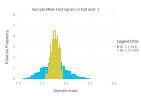

In [4]:
histograms[1]

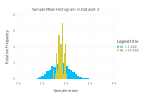

In [5]:
histograms[2]

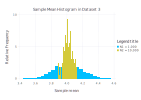

In [6]:
histograms[3]

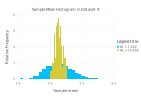

In [7]:
histograms[4]

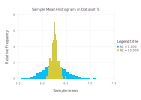

In [8]:
histograms[5]

### Each histogram shows visibly smaller standard deviation for the larger sample size.

__3.__ You can now determine the true autocorrelation function for each variable, $\hat{C}_{v_{a}, n}$, which is given by:

$$\hat{C}_{v_{a}, n} = \frac{1}{M-n} \sum_{i=1}^{M-n} \big(v_{a,i+n} - \hat{\bar{v}}_{a}\big)\big(v_{a,i} - \hat{\bar{v}}_{a}\big)$$

$n$ goes from 0 to some maximum value $n_{cut}$ with $n_{cut} << M$. Plot $\hat{C}_{v_{a},n}/\hat{C}_{v_{a},0}$ versus $n$ for $a = 1...5$.

We want to pick our bin sizes $n$ such that $\hat{C}_{v_{a},n}$ is small.

In [9]:
include("q1/p3.jl");


Part 3

	Calculating autocorrelations

	Making autocorrelation plots and placing in 'plots' vector


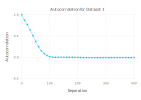

In [10]:
plots[1]

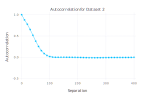

In [11]:
plots[2]

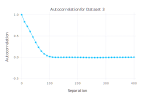

In [12]:
plots[3]

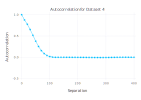

In [13]:
plots[4]

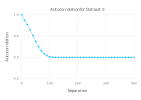

In [14]:
plots[5]

__3.__ Find the integrated autocorrelation times

$$
  \hat{\tau}_{int,v_{a}} \equiv 
  \frac{1}{2}\frac{1}{\hat{C}_{v_{a},0}} \sum_{n=-n_{cut}}^{n_{cut}} \hat{C}_{v_{a},n} =
  \sum_{n=0}^{n_{cut}} \frac{\hat{C}_{v_{a},n}}{\hat{C}_{v_{a},0}} - \frac{1}{2}
$$

...since the zeroth term equals 1.

Estimate a value for $n_{cut}$ from your plots. $n_{cut}$ should be large enough that $\hat{C}_{v_{a},n}/\hat{C}_{v_{a},0}$ has gotten close enough to zero that the value of $\hat{\tau}_{int,v_{a}}$ is not affected by modest changes in $n_{cut}$.

*Judging by the above plots, $\hat{C}_{v_{a},n}/\hat{C}_{v_{a},0}$ reaches zero at around $n = 100$ for each dataset. __Pick $n_{cut} = 150$ to be on the safe side.__*

In [ ]:
include("q1/p4.jl")


Part 4


__5.__ Calculate the true standard deviation of the data, *i.e.*

$$
  \hat{\sigma}_{v_{a}}^{2} \equiv
  \frac{1}{M-1} \sum_{i=1}^{M} (v_{a,i} - \hat{\bar{v}}_{a})^{2}
$$

For a sample of size %N%, we should have

$$
  \hat{\sigma}_{\bar{v}_{a},N} = 
  \sqrt{\frac{2\hat{\tau}_{int,v_{a}}}{N}} \hat{\sigma}_{v_{a}}
$$

Giving the testable hypothesis that

$$
  N = 2 \hat{\tau}_{int,v_{a}} 
  \frac{\hat{\sigma}_{v_{a}}^{2}}{\hat{\sigma}_{\bar{v}_{a},N}^{2}}
$$

In [ ]:
include("q1/p5.jl")

__6.__ Calculate the true covariance matrix for the data, defined by

$$
  \hat{c}_{v_{a},v_{b}} = \frac{1}{M} \sum_{i=1}^{M}
  (v_{a,i} - \hat{\bar{v}}_{a}) (v_{b,i} - \hat{\bar{v}}_{b})
$$

It is customary to define a normalized version of $\hat{c}_{v_{a},v_{b}}$ by

$$
  \hat{\rho}_{v_{a},v_{b}} \equiv
  \frac{\hat{c}_{v_{a},v_{b}}}{\hat{\sigma}_{v_{a}}\hat{\sigma}_{v_{b}}}
$$

__*Some scratch work for problem 6:*__

<img src="q1/p6-scratch.png" style="width:100%">

We can nicely express the covariance matrix $\hat{c}$ as

$$
  \hat{c} = \frac{1}{M} D^{T}D
$$

or in code as

```
ĉ = transpose(D) * D ./ M
```

where

```
D = v - ones(M) * transpose(v̄̂)
```

and we can write $\hat{\rho}_{v_{a},v_{b}}$ as

```
  ρ̂ = ĉ ./ ( σ * transpose(σ) )
```

In [ ]:
include("q1/p6.jl")

### As expected, the normalized variances along the main diagonal are all 1.

In [ ]:
using PyPlot
surf(ρ̂)
xlabel("va")
ylabel("vb")
title("Normalized Covariance between Datasets")

### I'm having trouble getting matplotlib to render the surface correctly; it looks fine from a different angle (nicely peaked along the main diagonal), but from the default angle, those polygons are transparent. 

__7.__ Pick two groups of data from the full universe of data. One should have N = 1,000 and the other should have N = 10,000. These two groups represent results one might get from simulations. These two groups represent results one might get from simulations. We want to see how well these groups represent reqults one might get from simulations. We want to see how well these groups reproduced the true statistical results for these data.

*a.* Estimate the autocorrelation function $C_{v_{a},n}$ from these two groups and the integrated autocorrelation time.

*b.* Use these to determine the standard deviation of the mean $\sigma_{\bar{b}_{a},N}$.

*c.* Compare this with the results from the universe of data. Also compare the normalized covariance matrix $\rho_{v_{a},v_{b}}$ from these small samples with the universe of data.

In [ ]:
include("q1/p7.jl")

In [ ]:
plots1[1]

In [ ]:
plots1[2]

In [ ]:
plots1[3]

In [ ]:
plots1[4]

In [ ]:
plots1[5]

## The autocorrelation takes too many steps (> 100) to settle down for N1 = 1,000.

We know from earlier that $n_{cut}=150$ should be sufficient, but just working off of sample sizes of 1,000, we aren't able to satisfy the condition that $n_{cut} << N_{1}$.

In [ ]:
plots2[1]

In [ ]:
plots2[2]

In [ ]:
plots2[3]

In [ ]:
plots2[4]

In [ ]:
plots2[5]

### *Let's see how good ρ1 and ρ2 were as estimates of ρ̂:*

In [ ]:
ρratio1 = ρ̂ ./ ρ1

In [ ]:
ρrelerr1 = ones(5,5) - ρratio1

__*Even for the smaller of the two sample sizes, $N1 = 1,000$, the estimate is fairly close to the true value, except for the correlations between datasets v1 and v5, which are off for both sample sizes.*__

In [ ]:
ρratio2 = ρ̂ ./ ρ2

In [ ]:
ρrelerr2 = ones(5,5) - ρratio2

__*Again, the estimates are (for the most part) significantly better for the larger sample size. Let's compare the ratio of the relative errors of the two estimators:*__

In [ ]:
ρrelerrratio = ρrelerr1 ./ ρrelerr2

__*Take the geometric mean of the off-diagonal rows to see how much of a reduction in error we get, on average, in going from N1 = 1,000 to N2 = 10,000.*__

In [ ]:
ρoffdiagratio = ρrelerrratio;
mn = 1
for i in [1:5]
    ρoffdiagratio[i,i] = 1.0;   # Set diagonals to 1
end
for r in ρoffdiagratio
    mn *= r;
end
mn = mn ^ (1/16);           # Off-diagonal elements

__*While the overall picture is a little muddled (there are some correlation factors where the smaller sample size coincidentally gets a more accurate measurement), the correlation factors estimated in this particular case with the larger sample size are, on average, around 2.6 times better in terms of relative error than the smaller sample sizes.*__

### _Question 2_

__1.__ Break the $M$ measurements up into groups of size $N$, calculate $\bar{v}_{a}$ for each group and then calculate $f_{i}(\bar{b}_{a})$ for each group. Calculate these function of the data means for all $M/N$ groups and find the standard deviation for $f_{i}(\bar{v}_{a})$, $\hat{\sigma}_{f_{i},N}$.

In [30]:
include("q2/p0.jl")
include("q2/p1.jl")


~~ QUESTION 2 ~~

RUNNING QUESTION 1 SCRIPT AGAIN

~~ QUESTION 1 ~~

Part 1
	The true means v̄̂1, v̄̂2, ..., v̄̂5 are:

	v̄̂[1] = 1.7608399300642636
	v̄̂[2] = 2.886344221395922
	v̄̂[3] = 4.01184851272758
	v̄̂[4] = 5.137116475044777
	v̄̂[5] = 6.262384437361974

Part 2

	N1 = 1000
	N2 = 10000

	 Standard deviations of the sample means are:

	σ̂1 = [0.24311784337397993,0.19294412355261062,0.17705504776718253,0.1942781528615023,0.24564575367828553]
	σ̂2 = [0.08172736485350657,0.06386716663997997,0.05606668407073371,0.05900974192855537,0.07424533843618523]

	We expect (σ̂1./σ̂2).^2 = N2/N1 = 10:

	(σ̂1[1]/σ̂2[1])^2 = 8.849091320213951
	(σ̂1[2]/σ̂2[2])^2 = 9.12657468656696
	(σ̂1[3]/σ̂2[3])^2 = 9.972565157927063
	(σ̂1[4]/σ̂2[4])^2 = 10.839281637664836
	(σ̂1[5]/σ̂2[5])^2 = 10.94662245831677

	...which is pretty close.

	Making histograms and placing in 'histograms' vector
Part 1
RESUMING QUESTION 2

	Calculating functions of means f1v1, f2v1, ...

	Calculating standard deviations of the funct

0.037721615637770205

In [31]:
include("q2/p2.jl")

Calculating σ̂f1, σ̂f2, σ̂f3 for sample sizes N1, N2

	Naive standard deviations for sample size 1,000
	σ̂f1N1 = 0.09358325029691549
	σ̂f2N1 = 0.08531349962730816
	σ̂f3N1 = 0.19846003433749787

	Naive standard deviations for sample size 10,000
	σ̂f1N2 = 0.031368333151644764
	σ̂f2N2 = 0.026418957974093424
	σ̂f3N2 = 0.06523332542094236

	True standard deviations for sample size 1,000
	σ̂truef1N1 = 0.04806147844102485
	σ̂truef2N1 = 0.029333752253445103
	σ̂truef3N1 = 0.11336945628023494

	True standard deviations for sample size 10,000
	σ̂truef1N2 = 0.01607397202563451
	σ̂truef2N2 = 0.009444648233277958
	σ̂truef3N2 = 0.037721615637770205


In [32]:
include("q2/p3.jl")

Part 3

	Estimating mean and standard deviation using
	jacknife resampling with bin size of 40.

	Estimated means, using N = 10000 and b = 40:

		dataset 1: 1.7405204690023046
		dataset 2: 2.8572197300584294
		dataset 3: 3.973918991114564
		dataset 4: 5.113901871965279
		dataset 5: 6.253884752816004

	Estimated standard deviations:

		dataset 1: 0.04992736300388104
		dataset 2: 0.038429589950498916
		dataset 3: 0.03473670589572516
		dataset 4: 0.039887332876986356
		dataset 5: 0.05244070766470152

	Calculating dependence of jacknife σ estimator on b.

	Generating plots in σvsbplots to show that dependence.


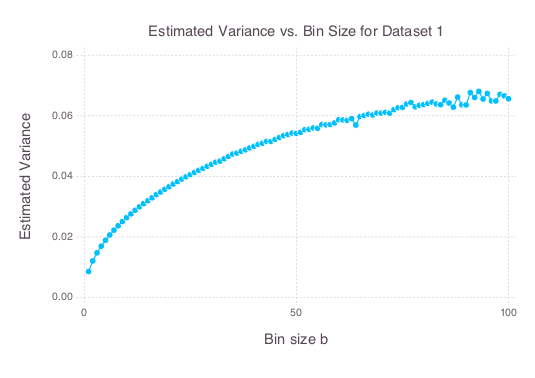

In [33]:
σvsbplots[1]

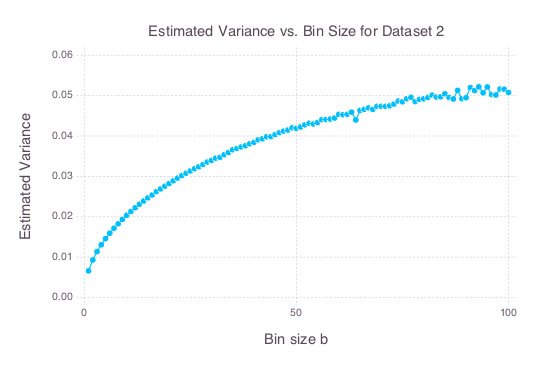

In [34]:
σvsbplots[2]

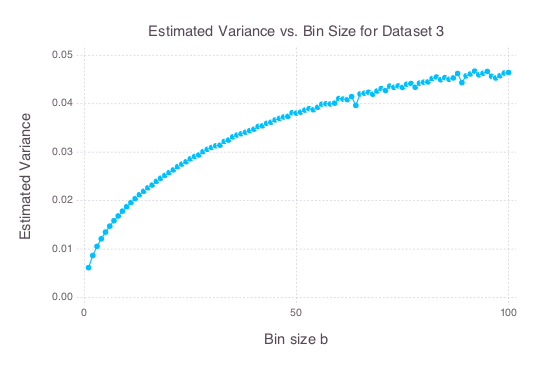

In [35]:
σvsbplots[3]

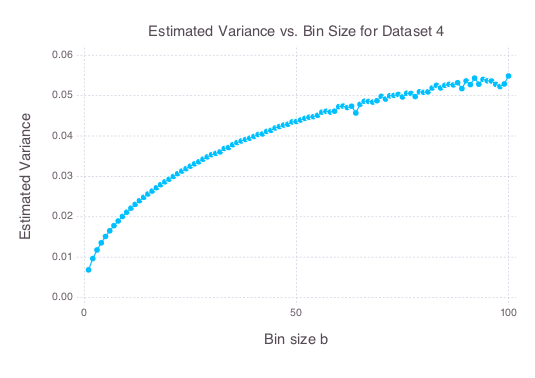

In [36]:
σvsbplots[4]

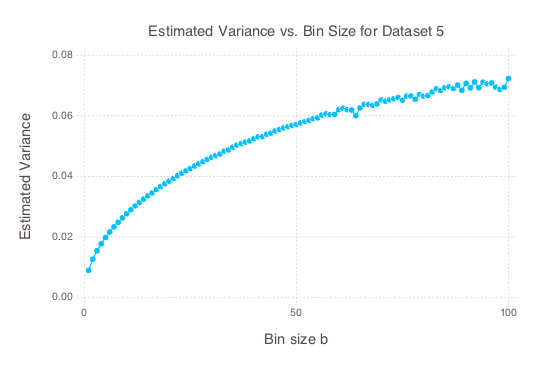

In [37]:
σvsbplots[5]

The estimated standard deviations scale with the square root of the bin size, which intuitively makes sense, given that jacknife resampling suppresses variance as bin count increases. Random fluctuations due to falling bin size become apparent beyond around b=60, but near b=40 (the rough autocorrelation time we calculated for each of our datasets), the estimated variance is stable.

__4.__ Now calculate $f_{i}(v^{\prime}_{a,k})$ for each of the $N/b$ jacknife blocks. You can then determine $\sigma_{f_{i},N}$ from

$$
\sigma^{2}_{f_{i},N} = \frac{N/b - 1}{N/b}
\sum^{N/b}_{k=1}(f_{i}(v^{\prime}_{a,k})-f_{i}(\bar{v}_{a}))^2
$$

Again, do this for a few values of b that are comparable to the integrated autocorrelation time. How does $\sigma_{f_{i},N}$ compare with $\hat{\sigma}_{f_{i},N}$ from part 1?

In [46]:
include("q2/p4.jl")


Part 4

	Estimating σ for f1..f3 with bin around b=40

	Generating plots in σfvsb to show σf dependence on b.

	Compare σfjack to naive σ̂ from part 1:

		σ̂f1N2/σfjack[4,1] = 3.0732915815122976
		σ̂f2N2/σfjack[4,2] = 4.196699645267839
		σ̂f3N2/σfjack[4,3] = 2.8213301699893942


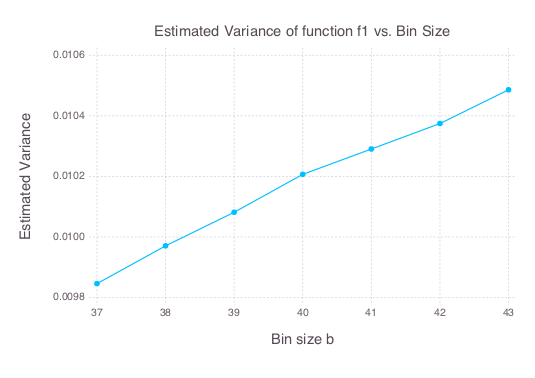

In [43]:
σfvsb[1]

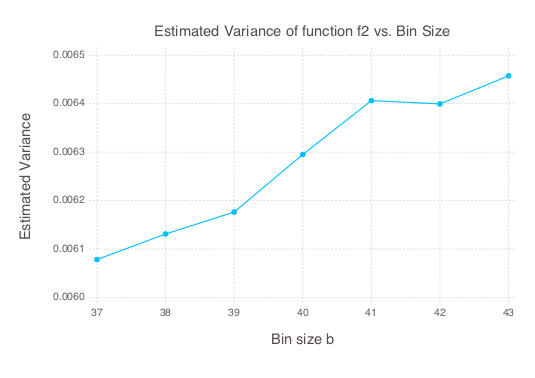

In [44]:
σfvsb[2]

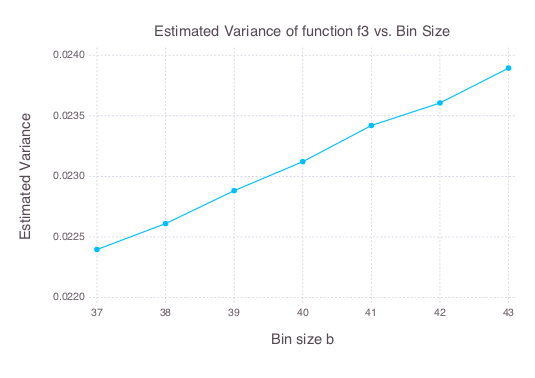

In [45]:
σfvsb[3]

The jacknife estimated standard deviations for the functions are each larger than our naive estimates. It seems that correlations between the variables were an important factor.